<a href="https://colab.research.google.com/github/danielamattos/Projetos---Master-Data-Decision-Science/blob/main/Atividade_Clusteriza%C3%A7%C3%A3o.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clusterização

### Atividade 1: Crie um dataframe a partir do banco de dados `basedosdados.br_inep_ideb.municipio` disponível em [Ideb](https://basedosdados.org/dataset/br-inep-ideb?bdm_table=municipio). Selecione apenas as colunas `ano`, `sigla_uf`, `taxa_aprovacao`, `nota_saeb_matematica`, `nota_saeb_lingua_portuguesa` e `ideb`.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd

df_ideb =  pd.read_csv('/content/drive/MyDrive/sirius/ideb (2).csv')


Mounted at /content/drive


In [ ]:
# seu código

df= df_ideb[['ano', 'sigla_uf','taxa_aprovacao','nota_saeb_matematica','nota_saeb_lingua_portuguesa','ideb']]

df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 294426 entries, 0 to 294425
Data columns (total 6 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   ano                          294426 non-null  int64  
 1   sigla_uf                     294426 non-null  object 
 2   taxa_aprovacao               230833 non-null  float64
 3   nota_saeb_matematica         197870 non-null  float64
 4   nota_saeb_lingua_portuguesa  197870 non-null  float64
 5   ideb                         222045 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 15.7+ MB


### Atividade 2: Selecione apenas os dados referentes ao ano de 2019 e agrupe os dados por estado, considerando a média.

In [ ]:
# seu código

df_2019 = df[df['ano'] == 2019].groupby(by='sigla_uf').mean()

df_2019 = df_2019.reset_index()



### Atividade 3: Padronize os dados.

In [ ]:
# seu código

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_scaled  = df_2019.copy()

df_scaled.drop(['sigla_uf','ano'], inplace=True, axis=1)

df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

df_scaled['sigla_uf'] = df_2019['sigla_uf']

df_scaled.head()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb,sigla_uf
0,-0.025280,0.080727,-0.016434,0.092154,AC
1,0.801179,-0.437122,-0.531887,-0.201424,AL
2,-0.426168,-1.474271,-1.443233,-1.063297,AM
3,-1.670713,-1.889188,-1.751891,-1.674063,AP
4,-1.323101,-0.713999,-0.626401,-1.060175,BA


### Atividade 4: Use o método do cotovelo para encontrar um valor adequado de k.

In [ ]:
# seu código

import seaborn as sns

df_scaled.corr()

,taxa_aprovacao,nota_saeb_matematica,nota_saeb_lingua_portuguesa,ideb
taxa_aprovacao,1.000000,0.694758,0.678749,0.810383
nota_saeb_matematica,0.694758,1.000000,0.991215,0.956512
nota_saeb_lingua_portuguesa,0.678749,0.991215,1.000000,0.938921
ideb,0.810383,0.956512,0.938921,1.000000


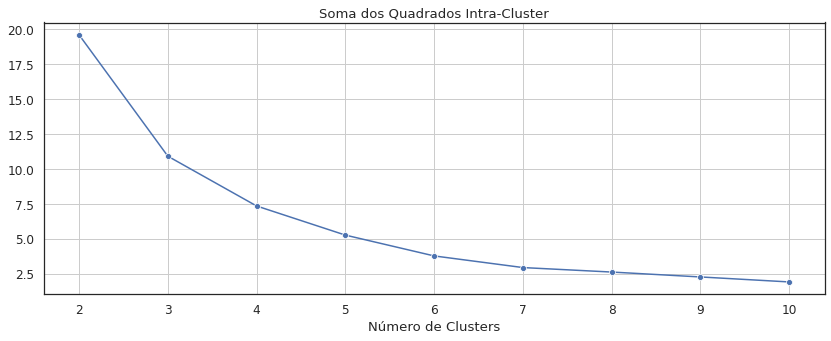

In [ ]:
# usaremos as variáveis Taxa de aprovação e IDEB

import matplotlib.pyplot as plt

sns.set(style='white', font_scale=1.1, rc={'figure.figsize':(14,5)})

from sklearn.cluster import KMeans

inercia = []
k_min = 2
k_max = 10

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['taxa_aprovacao','ideb']])
    inercia.append(kmeans.inertia_)

sns.lineplot(x=range(k_min,k_max+1), y=inercia, marker='o')
plt.title('Soma dos Quadrados Intra-Cluster')
plt.xlabel('Número de Clusters')
plt.grid(True)

### Atividade 5: Use o método da silhueta para encontrar um valor adequado de k

In [ ]:
# seu código

from sklearn.metrics import silhouette_score

silhueta = []
k_min = 2
k_max = 10
n = [i for i in range(k_min, k_max+1)]

for i in range(k_min,k_max+1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled[['taxa_aprovacao','ideb']])
    silhueta.append(silhouette_score(df_scaled[['taxa_aprovacao','ideb']],
                                     kmeans.labels_,
                                     metric='euclidean'))

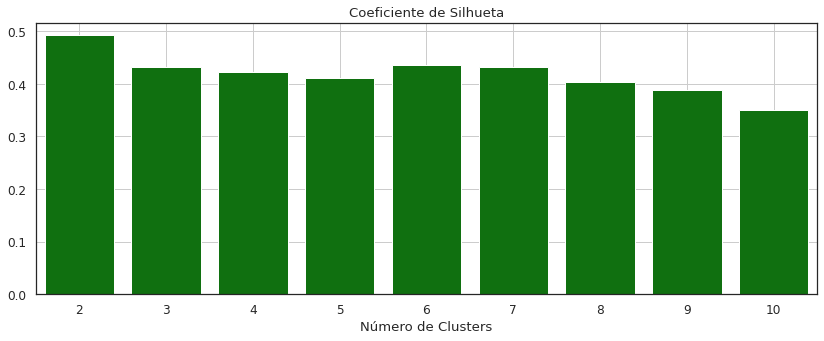

In [ ]:
sns.barplot(x=n, y=silhueta, color='green')
plt.title('Coeficiente de Silhueta')
plt.xlabel('Número de Clusters')
plt.grid(True)

### Atividade 6: Faça a clusterização com o valor escolhido para k.

In [ ]:
# seu código

def numero_otimo_clusters(k_min, k_max):
    from sklearn.cluster import KMeans
    import math
    inercia = []

    for i in range(k_min,k_max+1):
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(df_scaled[['taxa_aprovacao','ideb']])
        inercia.append(kmeans.inertia_)
    
    x0, y0 = k_min, inercia[0]
    x1, y1 = k_max, inercia[len(inercia)-1]

    distancias = []
    for i in range(len(inercia)):
        x = i+k_min
        y = inercia[i]
        numerador = abs( (y1-y0)*x - (x1-x0)*y + x1*y0 - y1*x0 )
        denominador = math.sqrt( (y1 - y0)**2 + (x1 - x0)**2 )
        distancias.append(numerador/denominador)
    return distancias.index(max(distancias)) + 2

# calculando a quantidade ótima de clusters
k_otimo = numero_otimo_clusters(2,10)

print('Número otimizado de clusters: ' + str(k_otimo))

Número otimizado de clusters: 4


k = 4

In [ ]:
kmeans = KMeans(n_clusters=4, random_state=42)

kmeans.fit(df_scaled[['taxa_aprovacao', 'ideb']])

kmeans.labels_

array([0, 0, 2, 1, 1, 3, 0, 3, 3, 2, 0, 0, 0, 1, 2, 0, 2, 3, 0, 1, 0, 2,
       0, 0, 1, 3, 0], dtype=int32)

### Atividade 7: Faça um gráfico de dispersão destacando cada grupo.

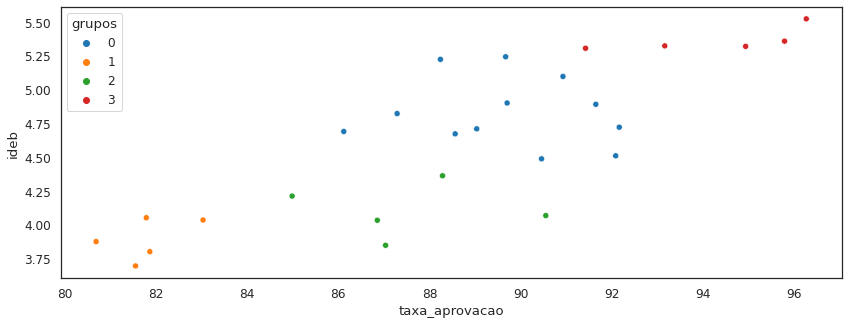

In [ ]:
# seu código

df_2019['grupos'] = kmeans.labels_.tolist()

sns.scatterplot(data=df_2019, x='taxa_aprovacao', y='ideb',
                hue='grupos', palette='tab10');


### Atividade 8: Quais são os estados de cada grupo?

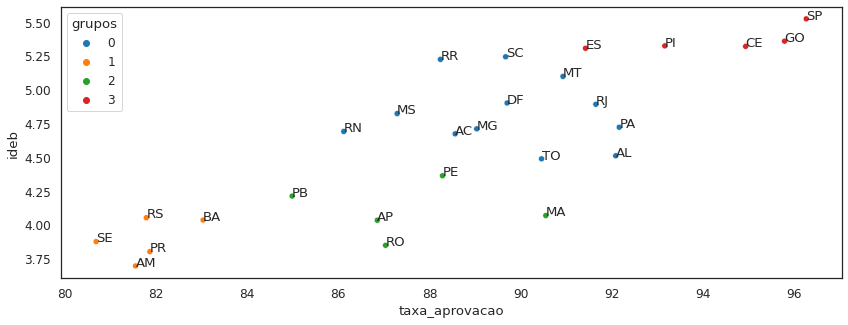

In [ ]:

df_2019['grupos'] = kmeans.labels_.tolist()

sns.scatterplot(data=df_2019, x='taxa_aprovacao', y='ideb',
                hue='grupos', palette='tab10');

aprov = df_2019['taxa_aprovacao']
ideb = df_2019['ideb']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# anotando os 'nomes' de cada ponto
for i, estado in enumerate(estados):
    plt.annotate(estado, (aprov[i], ideb[i]) );



### Atividade 9: Faça um boxplot para comparar os valores das variáveis por grupo.

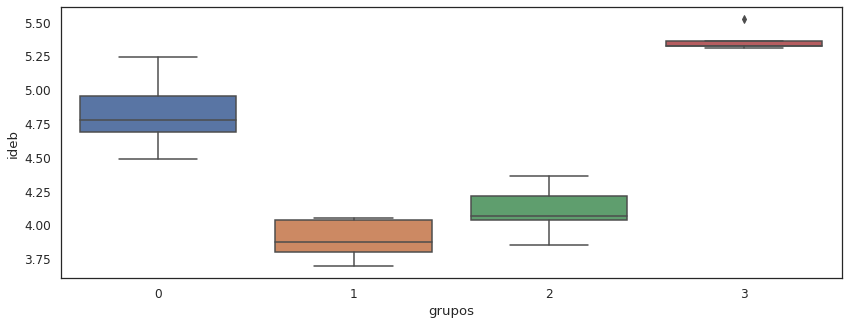

In [ ]:
# seu código

sns.boxplot(x= df_2019['grupos'], y= df_2019['ideb']);

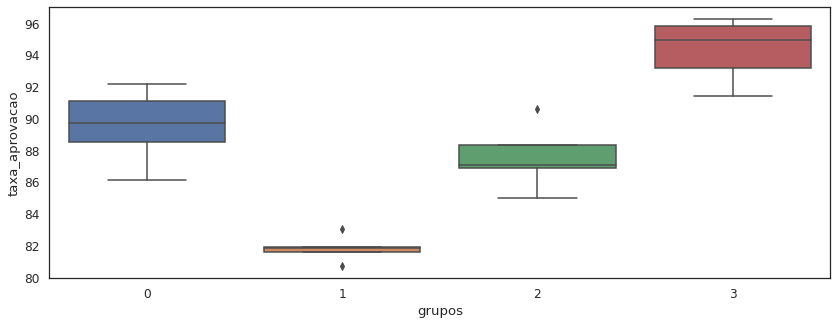

In [ ]:
sns.boxplot(x= df_2019['grupos'], y= df_2019['taxa_aprovacao']);

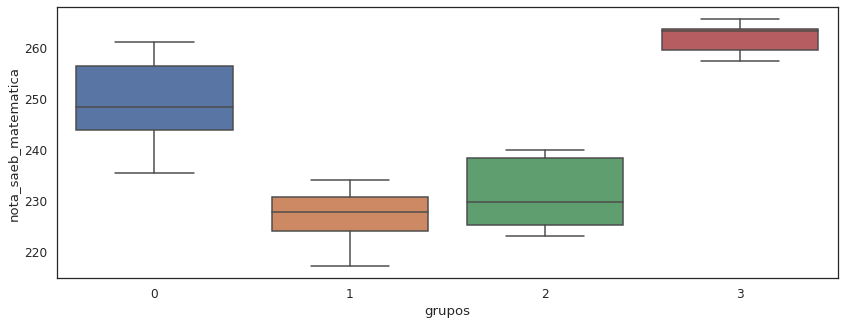

In [ ]:
sns.boxplot(x= df_2019['grupos'], y= df_2019['nota_saeb_matematica']);

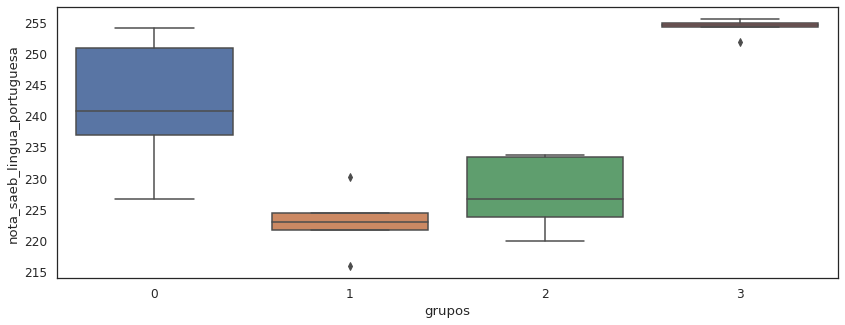

In [ ]:
sns.boxplot(x= df_2019['grupos'], y= df_2019['nota_saeb_lingua_portuguesa']);

### Atividade 10: Podemos afirmar, estatisticamente, que os grupos são distintos? Isto é, os dados foram adequadamente clusterizados?

In [ ]:
# seu código

df_grupo0= df_2019[df_2019['grupos'] == 0]
df_grupo1= df_2019[df_2019['grupos'] == 1]
df_grupo2= df_2019[df_2019['grupos'] == 2]
df_grupo3= df_2019[df_2019['grupos'] == 3]


from scipy.stats import f_oneway

f_oneway(df_grupo0['ideb'],df_grupo1['ideb'],df_grupo2['ideb'],df_grupo3['ideb'])

F_onewayResult(statistic=57.57684464569191, pvalue=7.542508219427153e-11)

In [ ]:
f_oneway(df_grupo0['taxa_aprovacao'],df_grupo1['taxa_aprovacao'],df_grupo2['taxa_aprovacao'],df_grupo3['taxa_aprovacao'])

F_onewayResult(statistic=41.88559299972311, pvalue=1.7496929460410136e-09)

A hipótese nula é de que as médias do IDEB e da taxa de aprovação dos grupos são iguais.
A hipótese alternativa é de que as médias do IDEB e da taxa de aprovação dos grupos são diferentes. Como o pvalor deu menor do que o nível de significância, podemos afirmar com 95% de confiança que as médias do IDEB e da taxa de aprovação dos grupos são diferentes.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

df_grupos= pd.concat([df_grupo0,df_grupo1,df_grupo2, df_grupo3])

print(pairwise_tukeyhsd(endog = df_grupos['ideb'], groups = df_grupos['grupos'], alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1   -0.939  0.001 -1.2417 -0.6363   True
     0      2   -0.726  0.001 -1.0287 -0.4233   True
     0      3   0.5353  0.001  0.2326   0.838   True
     1      2    0.213 0.3786 -0.1467  0.5727  False
     1      3   1.4743  0.001  1.1146   1.834   True
     2      3   1.2613  0.001  0.9016   1.621   True
----------------------------------------------------


In [ ]:
print(pairwise_tukeyhsd(endog = df_grupos['taxa_aprovacao'], groups = df_grupos['grupos'], alpha = 0.05))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -7.8708  0.001 -10.545 -5.1967   True
     0      2  -2.1146 0.1565 -4.7887  0.5595  False
     0      3   4.6543  0.001  1.9801  7.3284   True
     1      2   5.7562  0.001  2.5789  8.9336   True
     1      3  12.5251  0.001  9.3478 15.7024   True
     2      3   6.7689  0.001  3.5915  9.9462   True
----------------------------------------------------


Podemos afirmar que os grupos são distintos em relação a média do IDEB e da taxa de aprovação, pois podemos rejeitar a hipótese nula ao nível de 5% de significância para a maior parte dos grupos, porém não podemos afirmar que há diferença entre as médias do IDEB dos grupos 2 e 3 e entre as médias da taxa de aprovação dos grupos 0 e 2.

### Atividade 11: Faça a clusterização com outro valor para k.

k = 3

In [ ]:
# seu código

kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(df_scaled[['taxa_aprovacao', 'ideb']])

kmeans.labels_

array([2, 2, 1, 1, 1, 0, 2, 0, 0, 2, 0, 2, 2, 1, 1, 2, 2, 0, 2, 1, 2, 1,
       2, 0, 1, 0, 2], dtype=int32)

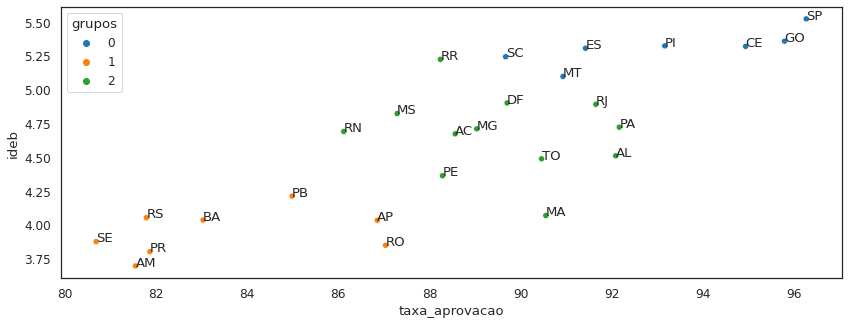

In [ ]:
df_2019['grupos'] = kmeans.labels_.tolist()

sns.scatterplot(data=df_2019, x='taxa_aprovacao', y='ideb',
                hue='grupos', palette='tab10');

aprov = df_2019['taxa_aprovacao']
ideb = df_2019['ideb']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# anotando os 'nomes' de cada ponto
for i, estado in enumerate(estados):
    plt.annotate(estado, (aprov[i], ideb[i]) );


### Atividade 12: Qual dos dois valores testados para k seria mais adequado?

Resposta: O valor 3, pois podemos afirmar com 95% de confiança que a média do IDEB e a média da taxa de aprovação dos 3 grupos são diferentes entre si, conforme teste de Tukey.

In [ ]:
df_grupo0= df_2019[df_2019['grupos'] == 0]
df_grupo1= df_2019[df_2019['grupos'] == 1]
df_grupo2= df_2019[df_2019['grupos'] == 2]

df_grupos= pd.concat([df_grupo0,df_grupo1,df_grupo2])

print(pairwise_tukeyhsd(endog = df_grupos['ideb'], groups = df_grupos['grupos'], alpha = 0.05))



Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     0      1   -1.366 0.001 -1.6605 -1.0715   True
     0      2  -0.6384 0.001  -0.909 -0.3678   True
     1      2   0.7276 0.001  0.4679  0.9873   True
---------------------------------------------------


In [ ]:
print(pairwise_tukeyhsd(endog = df_grupos['taxa_aprovacao'], groups = df_grupos['grupos'], alpha = 0.05))

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------
     0      1  -9.6883  0.001 -12.6281 -6.7485   True
     0      2  -3.6541 0.0068  -6.3555 -0.9526   True
     1      2   6.0343  0.001   3.4416  8.6269   True
-----------------------------------------------------


### Atividade 13: (Para refletir) Como poderíamos fazer a clusterização e visualizar os grupos se tivessemos que usar mais de duas variáveis?

Dica: Pesquise sobre Redução de Dimensionalidade, é um assunto bem divertido!

Seria interessante fazermos uma redução da dimensionalidade, para verificar quais são as variáveis mais relevantes, podemos verificar quais são as variáveis que tem correlações fortes, pois são redundantes, e desconsiderarmos uma das variáveis que se correlaciona fortemente com outra. Podemos usar três técnicas do Scikit-Learn para fazer a redução, principal component analysis (PCA), LinearDiscriminantAnalysis (LDA), e Isomap.